# The G-cross function computes the probability distribution of immune cells nearest to tumor cells within any given distance


In [1]:
from queries import*
from utilities import*
from scipy.spatial import Delaunay
from numpy import linalg
from sklearn import preprocessing

## Importing edges

In [44]:
edges = pd.read_csv('./data/output/edges_thrd_100.csv')

In [45]:
THRESHOLD =100
edges = graph_wrangling(edges,THRESHOLD, only_border = True)

In [48]:
edges['phenotype_1'] = edges['phenotype_1'].apply(lambda x: get_phenotype(x))
edges['phenotype_2'] = edges['phenotype_2'].apply(lambda x: get_phenotype(x))

In [49]:
edges.head(5)

,distance,cell_id_1,cell_id_2,tissue_category_1,tissue_category_2,phenotype_1,phenotype_2
9,40.121441,35764,35871,stroma,tumor,T,tumor
11,89.542448,35764,36167,stroma,tumor,T,tumor
12,75.152179,35764,35898,stroma,tumor,T,tumor
13,41.571384,35764,35864,stroma,tumor,T,tumor
19,45.496483,44539,44711,stroma,tumor,T,T


In [50]:
vector_distances =list(np.linspace(10,100,20))
TILs = ['T','B']
TILs_condition = (edges.phenotype_1.apply(lambda x: x in TILs)) | (edges.phenotype_2.apply(lambda x: x in TILs))
edges = edges[TILs_condition]

In [63]:
def G_cross_function(edges,vector_distances):
    total_number = len(edges)
    n = len(vector_distances)
    distribution = {}
    d_0 = vector_distances[0]
    df = edges[edges.distance< d_0].copy()
    distribution[d_0] = len(df)/total_number
    
    for index in range(n-1):
        d_1 = vector_distances[index]
        d_2 = vector_distances[index+1]
        condition = edges.distance< d_2
        df = edges[condition].copy()
        distribution[d_2] = len(df)/total_number
    distribution = pd.melt(pd.DataFrame(distribution, index = [0])  ) 
        
    return  distribution
        
        
    
    

In [65]:
distribution = G_cross_function(edges,vector_distances)

In [66]:
distribution

,variable,value
0,10.000000,0.001789
1,14.736842,0.005804
2,19.473684,0.014061
3,24.210526,0.026070
4,28.947368,0.042958
5,33.684211,0.064937
6,38.421053,0.092158
7,43.157895,0.124357
8,47.894737,0.162024
9,52.631579,0.204969


Text(0.5, 1.0, 'cumulatative probability  distribution of the number of TILs inside a given radius')

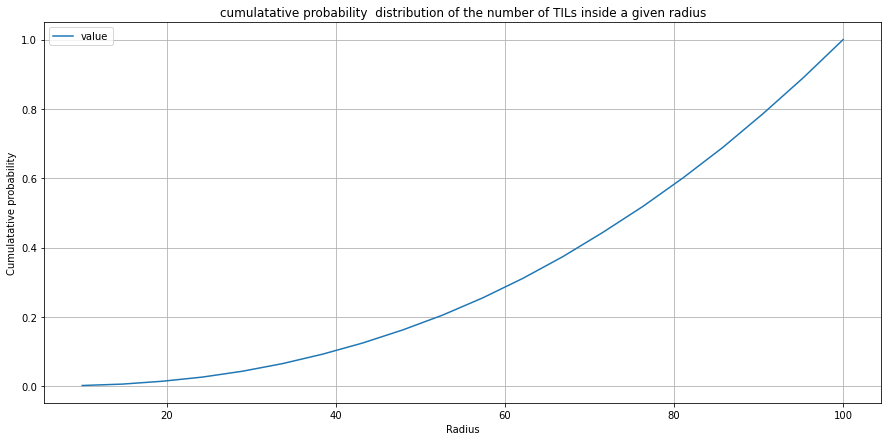

In [69]:
fig = distribution.plot(x='variable',y='value',figsize=(15,7))
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Cumulatative probability')
plt.title('cumulatative probability  distribution of the number of TILs inside a given radius')

In [ ]:
area = 0
